In [3]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation
import seaborn as sns; sns.set()
import numpy as np
from matplotlib import pyplot as plt
from keras_tqdm import TQDMNotebookCallback

In [6]:
data = pd.read_csv('./input/encoded_queries.csv',
                   converters={"input": lambda x: np.array(eval(x))})

In [7]:
data.dtypes

input       object
runtime    float64
dtype: object

In [8]:
data.head(10)

,input,runtime
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",7.040452
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",7.740461
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.240947
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",39.013127
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.188286
5,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",102.261551
6,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",13.017219
7,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.649951
8,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.132541
9,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.639457


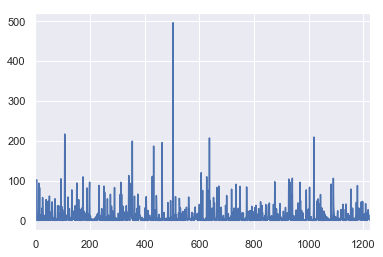

In [9]:
data.runtime.plot()

In [10]:
runtime_log = data.runtime.apply(np.log)
min_val = runtime_log.min()
max_val = runtime_log.max()

norm_runtime = (runtime_log - min_val) / (max_val - min_val)


In [11]:
data.input[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,

In [12]:
m = np.vstack(data.input.values)

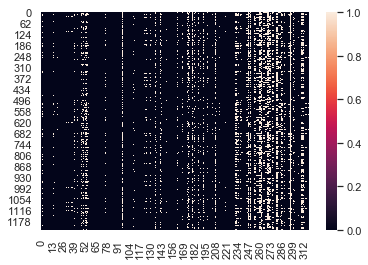

In [13]:
sns.heatmap(m)

In [14]:
m.shape

(1225, 318)

In [15]:
# define and fit the final model
model = Sequential()
model.add(Dense(64, input_dim=318, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam')
history = model.fit(m, norm_runtime, epochs=2000, verbose=0, 
                    validation_split=0.05)

W0819 20:04:30.549406 4574299584 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0819 20:04:30.609181 4574299584 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0819 20:04:30.622170 4574299584 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0819 20:04:30.676063 4574299584 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0819 20:04:30.806261 4574299584 deprecation_wrapper.py:119] From /anaconda3

In [16]:
def unnormalize_label(val):
    val = (val * (max_val - min_val)) + min_val
    return np.exp(val)

In [17]:
def predict(i):
    example_norm_predicted = model.predict(np.array([m[i]]))
    example_norm_runtime = norm_runtime[i]
    
    example_predicted = unnormalize_label(example_norm_predicted)
    example_runtime = unnormalize_label(example_norm_runtime)
    diff = np.abs(example_predicted - example_runtime)
    ratio = example_predicted / example_runtime if example_predicted > example_runtime else  example_runtime /example_predicted 
    return {'predicted': float(example_predicted), 'actual': example_runtime, 'diff': float(diff) ,'ratio':ratio}


In [18]:
diffs = []
ratios = []
for i in range(0,len(norm_runtime)):
    result = predict(i)
    diffs.append(result['diff'])
    ratios.append(result['ratio'])
    
print(np.mean(diffs), np.mean(ratios))

4.331839140598872 2.8791935


In [19]:
import random
for i in random.sample(range(0,len(norm_runtime)),10):
    print(i,':', predict(i))

479 : {'predicted': 3.3767852783203125, 'actual': 5.29750227928161, 'diff': 1.9207167625427246, 'ratio': array([[1.5688003]], dtype=float32)}
425 : {'predicted': 0.10401654988527298, 'actual': 0.31574082374572765, 'diff': 0.21172428131103516, 'ratio': array([[3.0354865]], dtype=float32)}
253 : {'predicted': 1.8359088897705078, 'actual': 2.144398927688598, 'diff': 0.3084900379180908, 'ratio': array([[1.1680312]], dtype=float32)}
553 : {'predicted': 32.451210021972656, 'actual': 33.23628401756284, 'diff': 0.7850723266601562, 'ratio': array([[1.0241923]], dtype=float32)}
912 : {'predicted': 0.45255327224731445, 'actual': 0.6377708911895752, 'diff': 0.18521761894226074, 'ratio': array([[1.4092726]], dtype=float32)}
1000 : {'predicted': 0.5371872782707214, 'actual': 0.5561017990112304, 'diff': 0.018914520740509033, 'ratio': array([[1.0352103]], dtype=float32)}
307 : {'predicted': 3.396681070327759, 'actual': 1.9774148464202888, 'diff': 1.4192662239074707, 'ratio': array([[1.7177383]], dtype

In [97]:
model.evaluate(m, norm_runtime, batch_size=128)

1225/1225 [==============================] - 0s 11us/step


0.006501086198401694

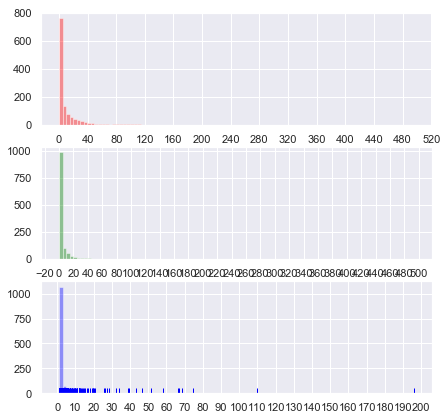

In [24]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

f, axes = plt.subplots(3, 1, figsize=(7, 7), sharex=False)

d1= sns.distplot(data.runtime,kde=False, color="red", bins=100,hist_kws={'log':False}, label="Sepal Length",ax=axes[0])
d1.xaxis.set_major_locator(ticker.MultipleLocator(40))
d1=sns.distplot(diffs,kde=False, color="green", bins=100,hist_kws={'log':False},label="Sepal Length",ax=axes[1])
d1.xaxis.set_major_locator(ticker.MultipleLocator(20))
d1=sns.distplot(ratios,kde=False, rug=True, color="blue", hist_kws={'log':False},bins=100,label="Sepal Width",ax=axes[2])
d1.xaxis.set_major_locator(ticker.MultipleLocator(10))

In [25]:
from keras.utils import plot_model
plot_model(model, to_file='model.png',show_shapes=True)

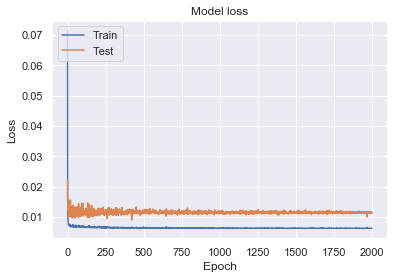

In [26]:

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()